In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# sudo pip install requests PIL -U

In [3]:
import googlemaps

In [4]:
import gmaps as gm

In [5]:
subte = pd.read_csv('../data/varios/estaciones-de-subte.csv',delimiter=',')
metrobus = pd.read_csv('../data/varios/estaciones-de-metrobus.csv',delimiter=';')
ferrocarril = pd.read_csv('../data/varios/estaciones-de-ferrocarril.csv',delimiter=';')

Los datos fueron provistos por [Properati](http://www.properati.com.ar) y [Buenos Aires Data](https://data.buenosaires.gob.ar/)

Los plot's fueron creados utilizando [Google Static Maps API](https://developers.google.com/maps/documentation/static-maps/)

def subte_color(linea):
    if (linea == 'A'): return 'cyan'
    if linea == 'B' : return 'red'
    if linea == 'C': return 'blue'
    if linea == 'D' :return ''
    if linea == 'E' :return 'darkviolet'
    if linea == 'H' :return 'gold'

In [6]:
subte['color'] = 'green'

In [7]:
subte.rename(columns={'X':'lon','Y':'lat'},inplace=True)

In [8]:
metrobus.rename(columns={'X':'lon','Y':'lat'},inplace=True)

In [9]:
ferrocarril.rename(columns={'LNG':'lon','LAT':'lat'},inplace=True)

In [10]:
ferrocarril['color'] = 'red'

In [11]:
metrobus['color'] = 'lime'

In [12]:
max_lat = ferrocarril['lat'].max()
min_lat = ferrocarril['lat'].min()

max_lon = ferrocarril['lon'].max()
min_lon = ferrocarril['lon'].min()

In [13]:
subte = subte.append(subte)

In [14]:
df = subte

In [15]:
for i in xrange(0,5):
    df = df.append(metrobus)
    df = df.append(ferrocarril)
    df = df.append(subte)

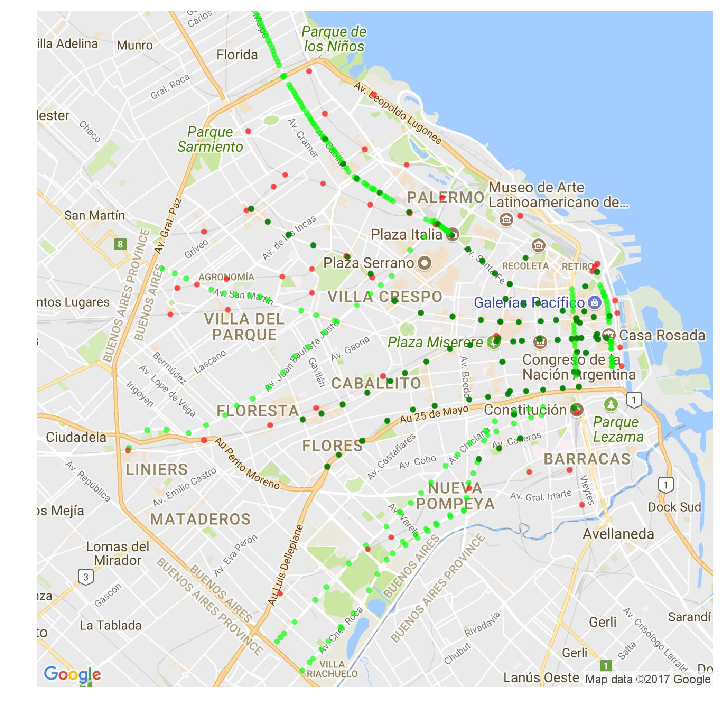

In [16]:
gm.scatter(latitudes=df.lat, longitudes=df.lon,colors=df.color)

In [17]:
properties = pd.read_csv('../data/properati_full_month.csv',low_memory=False)

In [18]:
properties = properties[properties['state_name'] == 'Capital Federal']

In [19]:
properties = properties[pd.notnull(properties['price_aprox_usd'])]

In [20]:
properties = properties[(properties['lon'] < max_lon) & (properties['lon'] > min_lon) & \
                        (properties['lat'] < max_lat) & (properties['lat'] > min_lat) ]#& \
                        #(properties['price_aprox_usd'] < 50000)]

In [21]:
properties_scatter = properties[['lon','lat','property_type']]

In [22]:
def property_type_color(atype):
    if atype == 'apartment': return 'lightcyan' 
    if atype == 'house' :return 'mediumblue'
    if atype == 'PH' :return 'salmon'
    if atype == 'store' : return 'indigo'

In [23]:
properties_scatter['color'] = properties_scatter.property_type.apply(property_type_color)

/home/brahvic/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


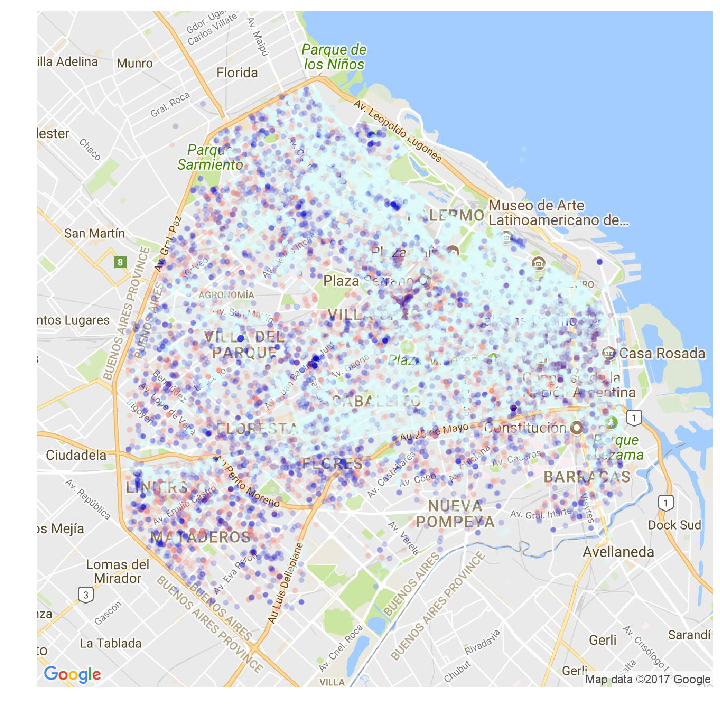

In [24]:
gm.scatter(latitudes=properties_scatter.lat,longitudes=properties_scatter.lon,colors=properties_scatter.color)

In [25]:
other_frame = properties_scatter.append(df)

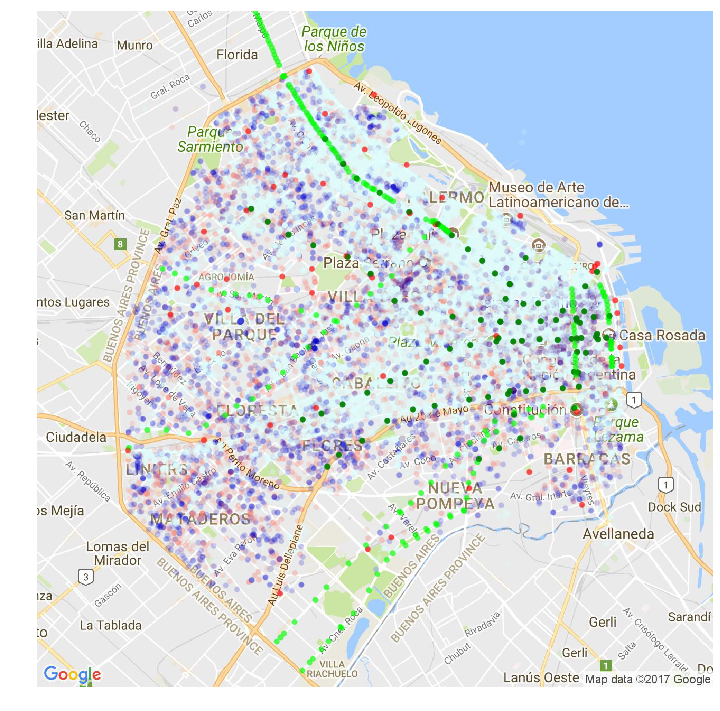

In [26]:
gm.scatter(latitudes=other_frame.lat, longitudes=other_frame.lon,colors=other_frame.color)

#### Los departamentos(apartment) estan representados por lightcyan, las casas(house) por mediumblue, los pisos (PH) por salmon, los locales (store) por indigo, los red de subtes por green , la red de metrobus por lime y las estaciones de trenes por red

#  Plot de densidad de publicaciones

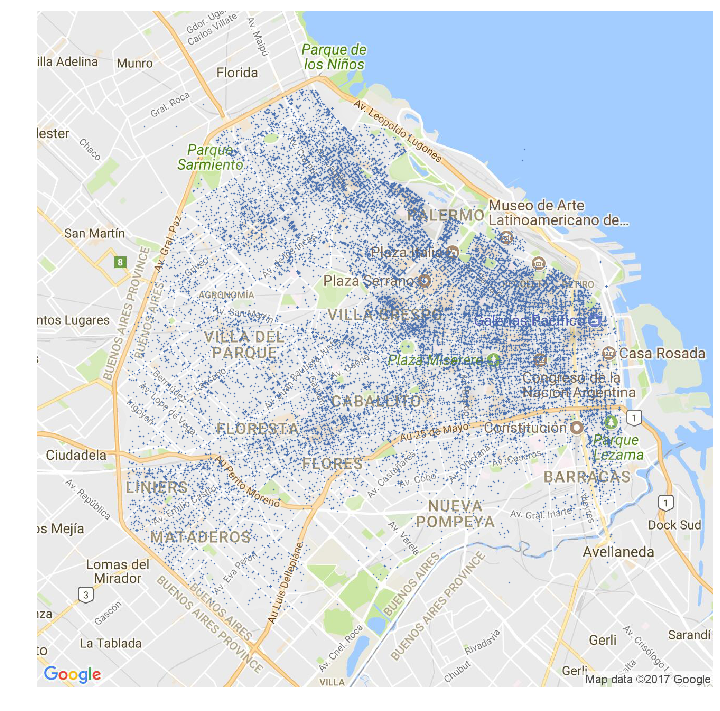

In [27]:
gm.density_plot(latitudes=properties.lat, longitudes=properties.lon)